In [5]:
import pandas as pd


from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##### Raw data in dict form, paste into a variable and convert to Dataframe

data_dict = {'Condition #': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11}, 'Note': {0: 'a0', 1: '0A', 2: '+-', 3: 'A0', 4: '0a', 5: '00', 6: '--', 7: '++', 8: '-+', 9: '00', 10: 'control'}, 'Balanced Feed': {0: 1.5, 1: 3.0, 2: 0.0, 3: 1.5, 4: 0.0, 5: 1.5, 6: 0.0, 7: 3.0, 8: 3.0, 9: 1.5, 10: 1.0}, 'Feed Supplement': {0: 0.0, 1: 1.5, 2: 3.0, 3: 3.0, 4: 1.5, 5: 1.5, 6: 0.0, 7: 3.0, 8: 0.0, 9: 1.5, 10: 1.0}, 'Titer (Replicate #1)': {0: 1490.9, 1: 3686.5, 2: 1100.3, 3: 1031.1, 4: 1723.0, 5: 3502.3, 6: 1565.8, 7: 1151.3, 8: 1471.7, 9: 2578.2, 10: 1995.8}, 'Titer (Replicate #2)': {0: 1553.3, 1: 3192.7, 2: 1064.4, 3: 1050.2, 4: 1652.6, 5: 2897.3, 6: 1642.6, 7: 1171.9, 8: 1399.1, 9: 2588.8, 10: 1867.9}, 'Average': {0: 1522.1, 1: 3439.6, 2: 1082.35, 3: 1040.65, 4: 1687.8, 5: 3199.8, 6: 1604.2, 7: 1161.6, 8: 1435.4, 9: 2583.5, 10: 1931.85}, 'Range ': {0: 62.4, 1: 493.8, 2: 35.9, 3: 19.1, 4: 70.4, 5: 605.0, 6: 76.8, 7: 20.6, 8: 72.6, 9: 10.6, 10: 127.9}, 'Percent diff': {0: 4.099599238, 1: 14.356320499999999, 2: 3.3168568389999997, 3: 1.8353913419999999, 4: 4.1711103210000005, 5: 18.90743171, 6: 4.787432988, 7: 1.773415978, 8: 5.057823603, 9: 0.41029611, 10: 6.620596837000001}}

In [2]:
data_dict = {'Condition #': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11}, 'Note': {0: 'a0', 1: '0A', 2: '+-', 3: 'A0', 4: '0a', 5: '00', 6: '--', 7: '++', 8: '-+', 9: '00', 10: 'control'}, 'Balanced Feed': {0: 1.5, 1: 3.0, 2: 0.0, 3: 1.5, 4: 0.0, 5: 1.5, 6: 0.0, 7: 3.0, 8: 3.0, 9: 1.5, 10: 1.0}, 'Feed Supplement': {0: 0.0, 1: 1.5, 2: 3.0, 3: 3.0, 4: 1.5, 5: 1.5, 6: 0.0, 7: 3.0, 8: 0.0, 9: 1.5, 10: 1.0}, 'Titer (Replicate #1)': {0: 1490.9, 1: 3686.5, 2: 1100.3, 3: 1031.1, 4: 1723.0, 5: 3502.3, 6: 1565.8, 7: 1151.3, 8: 1471.7, 9: 2578.2, 10: 1995.8}, 'Titer (Replicate #2)': {0: 1553.3, 1: 3192.7, 2: 1064.4, 3: 1050.2, 4: 1652.6, 5: 2897.3, 6: 1642.6, 7: 1171.9, 8: 1399.1, 9: 2588.8, 10: 1867.9}, 'Average': {0: 1522.1, 1: 3439.6, 2: 1082.35, 3: 1040.65, 4: 1687.8, 5: 3199.8, 6: 1604.2, 7: 1161.6, 8: 1435.4, 9: 2583.5, 10: 1931.85}, 'Range ': {0: 62.4, 1: 493.8, 2: 35.9, 3: 19.1, 4: 70.4, 5: 605.0, 6: 76.8, 7: 20.6, 8: 72.6, 9: 10.6, 10: 127.9}, 'Percent diff': {0: 4.099599238, 1: 14.356320499999999, 2: 3.3168568389999997, 3: 1.8353913419999999, 4: 4.1711103210000005, 5: 18.90743171, 6: 4.787432988, 7: 1.773415978, 8: 5.057823603, 9: 0.41029611, 10: 6.620596837000001}}

In [3]:
df_SFPM07 = test = pd.DataFrame(data_dict)
print(df_SFPM07.dtypes)

Condition #               int64
Note                     object
Balanced Feed           float64
Feed Supplement         float64
Titer (Replicate #1)    float64
Titer (Replicate #2)    float64
Average                 float64
Range                   float64
Percent diff            float64
dtype: object


In [7]:
df_SFPM07[Balanced Feed]

,Condition #,Note,Balanced Feed,Feed Supplement,Titer (Replicate #1),Titer (Replicate #2),Average,Range,Percent diff
0,1,a0,1.5,0.0,1490.9,1553.3,1522.10,62.4,4.099599
1,2,0A,3.0,1.5,3686.5,3192.7,3439.60,493.8,14.356320
2,3,+-,0.0,3.0,1100.3,1064.4,1082.35,35.9,3.316857
3,4,A0,1.5,3.0,1031.1,1050.2,1040.65,19.1,1.835391
4,5,0a,0.0,1.5,1723.0,1652.6,1687.80,70.4,4.171110
5,6,00,1.5,1.5,3502.3,2897.3,3199.80,605.0,18.907432
6,7,--,0.0,0.0,1565.8,1642.6,1604.20,76.8,4.787433
7,8,++,3.0,3.0,1151.3,1171.9,1161.60,20.6,1.773416
8,9,-+,3.0,0.0,1471.7,1399.1,1435.40,72.6,5.057824
9,10,00,1.5,1.5,2578.2,2588.8,2583.50,10.6,0.410296


In [10]:
x = df_SFPM07["Balanced Feed"]
y = df_SFPM07["Feed Supplement"]
z = df_SFPM07["Average"]

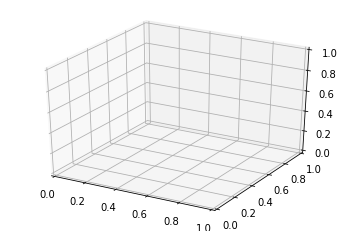

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

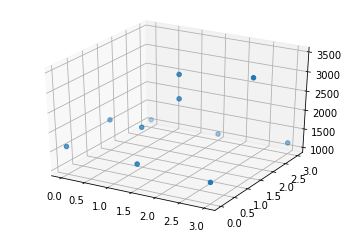

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, cmap = "Greens")

In [17]:
ax.scatter?